### <트리알고리즘>
#### 05-1 결정트리
#### * Keyword: 결정트리, 불순도, 정보이득, 가지치기, 특성 중요도
#### * 로지스틱 회귀로 와인 분류하기
#### * 핵심패키지와 함수 
#### - info(): 데이터프레임의 요약된 정보 출력
#### - describe(): 데이터프레임의 열의 통계값 제공
#### - DecisionTreeClassfier: 결정트리분류클래스 
####    --> criterion: 불순도(gini or entropy)
####    --> max_dept= : 트리가 성장할 최대 깊이 (기본값은 None)
####    --> plot_tree() : 결정트리모델 시각화

In [37]:
# 데이터셋 부르기: 6,497

import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data')
wine.head()

#class 0=레드와인, 1=화이트와인 

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [38]:
# 판다스 info() method: 데이터프레임의 각 열의 데이터 타입과 누락된 데이터 확인 가능
# Null값 없음

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [39]:
# 판다스 describe() method: 열에 대한 간단한 통계값 출력
# 알콜도수,  당, pH의 스케일이 다름 -> StandardScaler로 스케일 맞춰줘야함
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [40]:
# 처음 3개열을 data에 저장
# class는 target에 저장

data = wine [['alcohol','sugar','pH']]
target = wine ['class']

In [41]:
#훈련과 테스트 세트로 나누기
#train_test_split() 함수는 기본값으로 25%를 테스트 세트로 지정 
#샘플의 개수가 충분히 많음으로 test_size를 20%로 지정함

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state= 42)

In [42]:
print(train_input.shape, target_input.shape)

(5197, 3) (1300, 3)


In [43]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled= ss.transform(target_input)

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 과소적합

0.7808350971714451
0.7776923076923077


In [45]:
#계수와 절편 출력
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


### <결정트리:Decision Tree> 
#### -데이터를 잘 나눌수 있음

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))  #훈련세트
print(dt.score(test_scaled,test_target))     #테스트세트

#훈련세트>테스트세트 -> 과대적합

0.996921300750433
0.8592307692307692


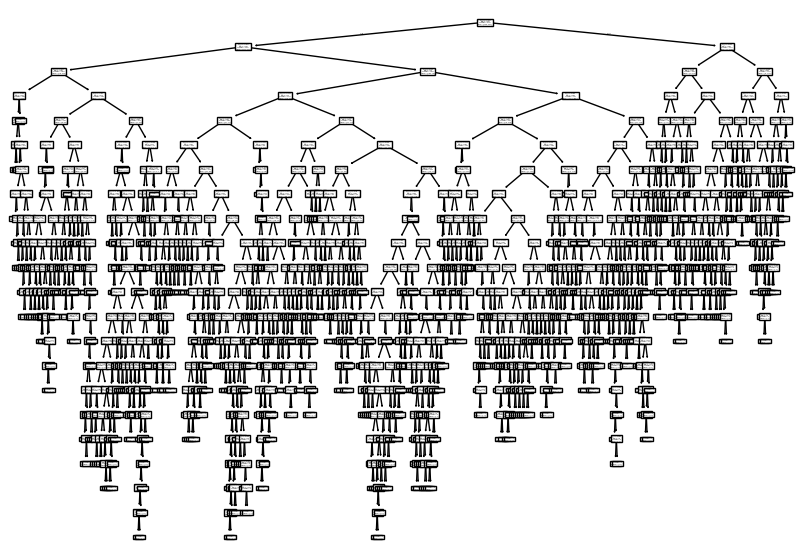

In [47]:
#plot_tree() 함수를 사용해 결정트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

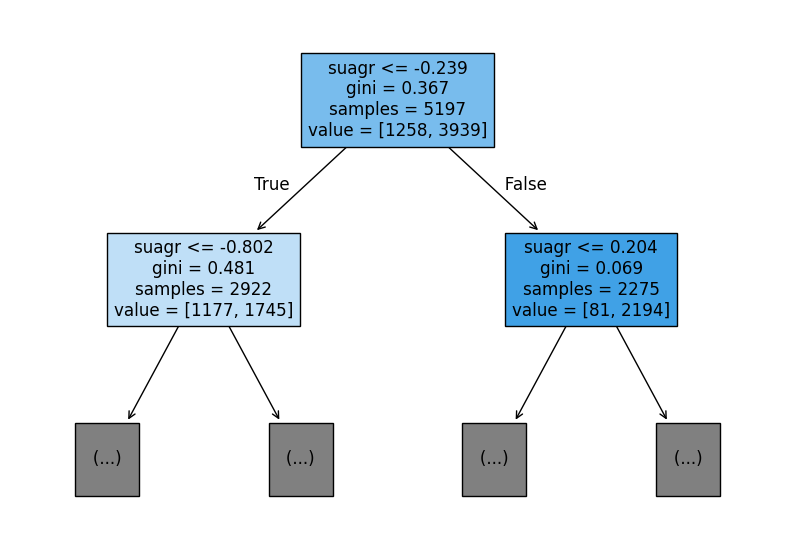

In [48]:
# plot_tree()함수에서 깊이를 제한해서 출력 
# max_depth 매개변수=1로 주면 루트 노드를 제외하고 하나의 노드를 확장해서 그림
# filded 매개변수로 클래스에 맞게 노드의 색칠가능 

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True,
          feature_names=['alcohol', 'suagr','pH'])
plt.show()

#### *불순도 : gini impurity
#### - DecisionTreeClassifier클래스 criterion 매개변수의 기본값이 'gini'
#### - 용도: 노드에서 데이터를 분할할 기준을 정함
#### - 지니 불순도 = 1-(음성클래스비율2 + 양성클래스비율2)
#### - 결정트리모델은 부모노드와 자식노드의 불순도 차이가 가능한 크도록 트리를 성장
#### - 불순도 차이 계산: 정보이득(informatio gain)
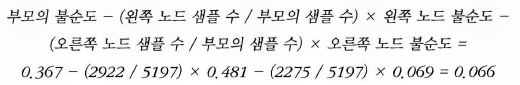
#### - 결정트리는 정보이득이 최대가 되도록 데이터를 나눔
#### - 엔트로피 불순도: criterion = 'entropy' 
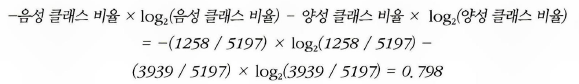
#### - 핵심사항: 불순도 기준을 사용해 정보 이득이 최대가 되도록 노드 분할

In [49]:
# 가지치기 : 자라날 수 있는 트리의 최대 깊이를 지정하여 가지치기를 진행함
# max_depth = 3 으로 지정하여 최대 3개 노드까지만 성장가능하게 코드 설계

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8454877814123533
0.8415384615384616


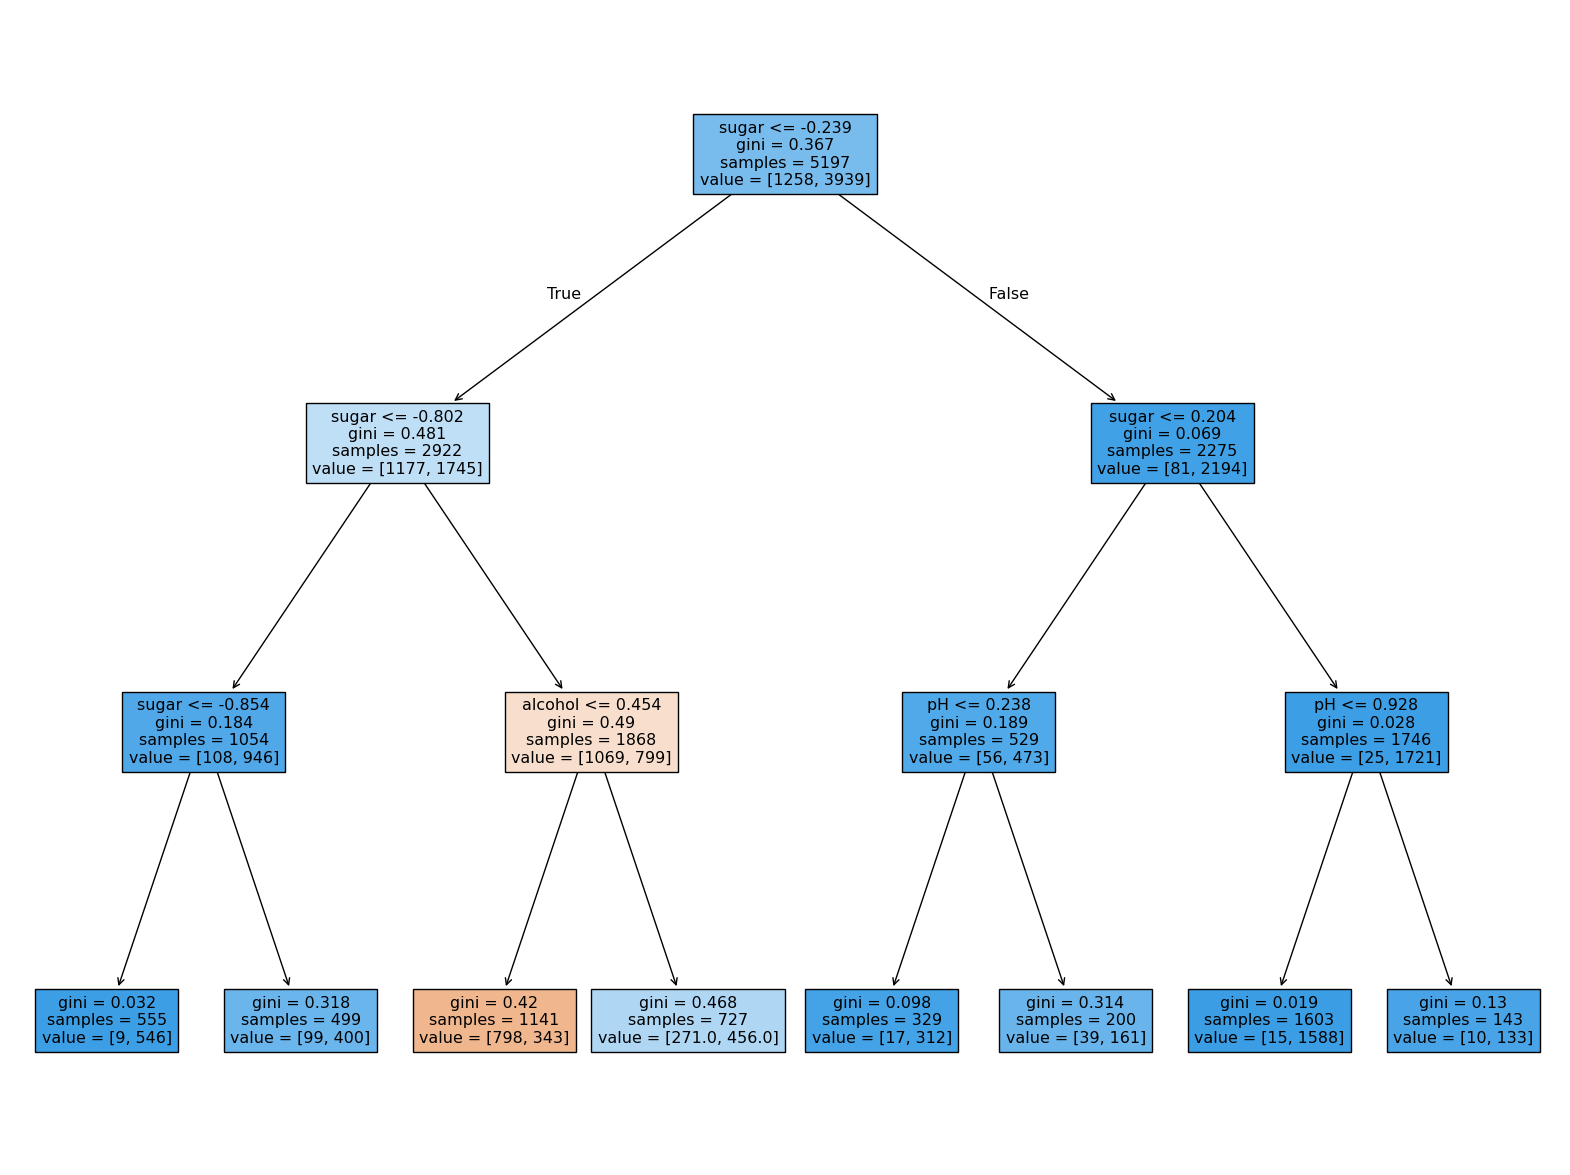

In [50]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
# 결정트리는 표준화 전처리 과정이 필요 없음
# 데이터셋을 scaled된 데이터셋을 사용하지 않아도 전처리한 결과랑 동일한 값이 예측됨

dt = DecisionTreeClassifier (max_depth= 3,random_state=42)
dt.fit (train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


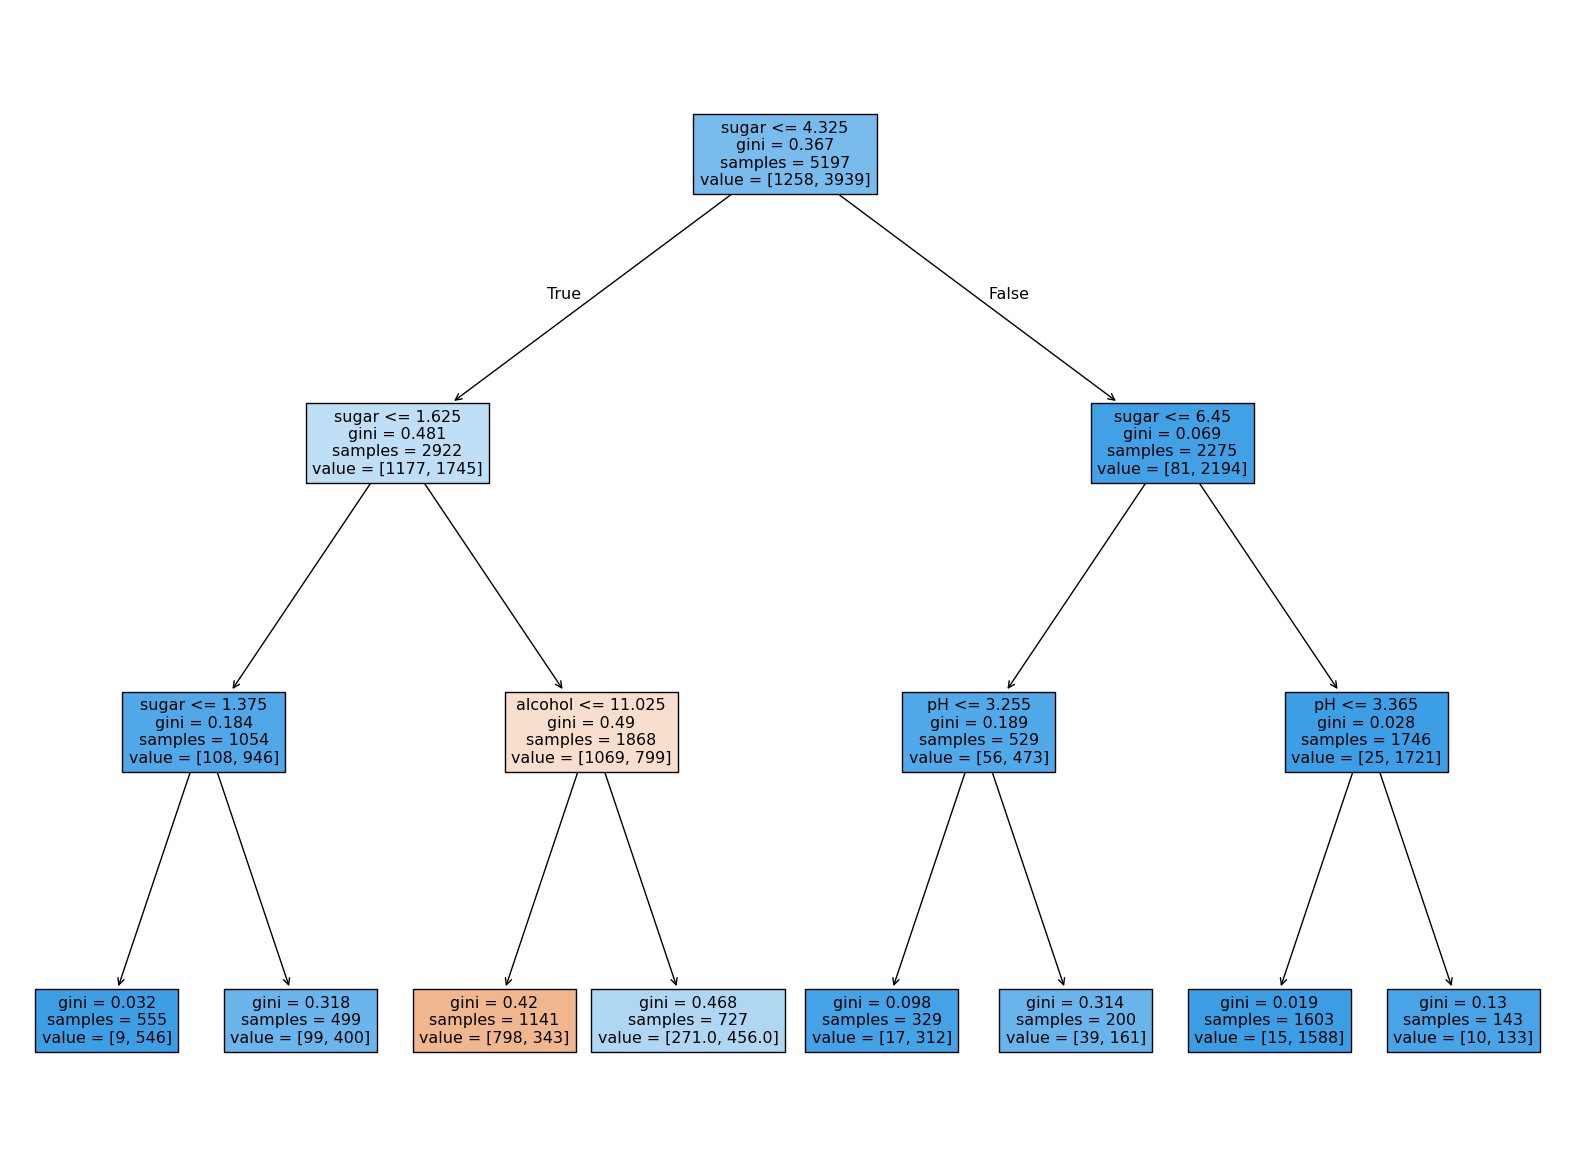

In [54]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
#feature의 중요도 확인 feature=['alcohole','sugar','pH]
#sugar의 중요도가 가장 높음으로, sugar가 결정트리의 중요한 feature인지 알 수 있음
#세 중요도를 합하면 1
#특성중요도 -> sugar
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
